1. 使用 Pandas 网络数据阅读器从雅虎财经获取金融数据


In [37]:
import pandas as pd  # 网络数据阅读器
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
start = datetime.datetime(2021, 5, 27)  # 开始时间
end = datetime.datetime(2022, 5, 26)  # 结束时间
# 从雅虎获取数据，雅虎已经停止向大陆提供服务，需要连接代理使用该方法。
df = web.DataReader("TSLA", 'yahoo', start, end)


In [38]:
df.tail()  # tail()方法一般用来对数据集进行矩阵形式的显示，默认显示为数据集的最后5行。


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-20,721.580017,633.000000,713.989990,663.900024,48190600,663.900024
2022-05-23,679.960022,638.059998,655.020020,674.900024,29634500,674.900024
2022-05-24,653.919983,620.570007,653.530029,628.159973,29697500,628.159973
2022-05-25,669.320007,623.010010,623.849976,658.799988,30713100,658.799988
2022-05-26,718.669983,653.659973,661.419983,707.729980,35334400,707.729980


2. 观察 df 的数据和结构


```
    count     254.000000 #数据数量
    mean      857.064052 #平均数
    std       168.881017 #标准差
    min       572.840027 #最小值
    25%       709.757492 #较低的百分位数
    50%       841.630005
    75%      1008.975006 #较高的百分位数
    max      1229.910034 #最大值
```

In [3]:
print(df["Adj Close"])


Date
2021-05-26    619.130005
2021-05-27    630.849976
2021-05-28    625.219971
2021-06-01    623.900024
2021-06-02    605.119995
                 ...    
2022-05-20    663.900024
2022-05-23    674.900024
2022-05-24    628.159973
2022-05-25    658.799988
2022-05-26    707.729980
Name: Adj Close, Length: 254, dtype: float64


In [4]:
print(df["Adj Close"].describe())

count     254.000000
mean      857.064052
std       168.881017
min       572.840027
25%       709.757492
50%       841.630005
75%      1008.975006
max      1229.910034
Name: Adj Close, dtype: float64


3. 使用 matplotlib 绘制股票市场曲线图


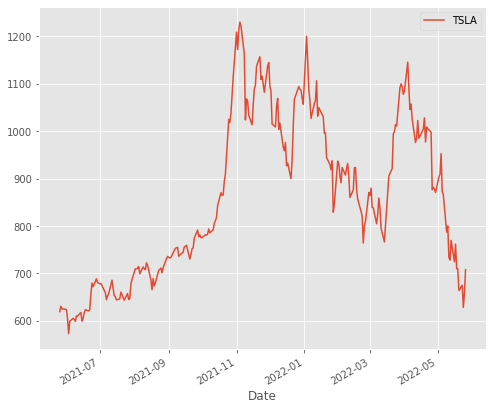

In [5]:
import matplotlib as mpl
from matplotlib import style  # 绘图样式
import matplotlib.pyplot as plt
%matplotlib inline
# 加上 上一行的语句可以不使用第12行的语句就生成图片
mpl.rc("figure", figsize=(8, 7))  # 自定义图形的各种默认属性，8行7列
# mpl.__version__
style.use('ggplot')  # ggplot代表图片主题，橙黄色就是图片的主题色
df["Adj Close"].plot(label="TSLA")  # 标签是TSlA
plt.legend()
#plt.show()


4. 生成移动平均值,确定趋势


In [6]:
import pandas_ta  # 这是一个面向股市的库,下方有更详细的介绍。
df.ta.ema(close="Adj Close", length=10, append=True)  # 数据前length长度计算移动平均值
df


,High,Low,Open,Close,Volume,Adj Close,EMA_10
Date,,,,,,,
2021-05-26,626.169983,601.500000,607.559998,619.130005,28639300,619.130005,NaN
2021-05-27,631.130005,616.210022,620.239990,630.849976,26370600,630.849976,NaN
2021-05-28,635.590027,622.380005,628.500000,625.219971,22737000,625.219971,NaN
2021-06-01,633.799988,620.549988,627.799988,623.900024,18084900,623.900024,NaN
2021-06-02,623.359985,599.140015,620.130005,605.119995,23302800,605.119995,NaN
...,...,...,...,...,...,...,...
2022-05-20,721.580017,633.000000,713.989990,663.900024,48190600,663.900024,746.346567
2022-05-23,679.960022,638.059998,655.020020,674.900024,29634500,674.900024,733.356286
2022-05-24,653.919983,620.570007,653.530029,628.159973,29697500,628.159973,714.229684


###### Pandas TA 是一个易于使用的库，它建立在 Python 的 Pandas 库的基础上，具有 100 多个指标和实用程序功能。这些指标通常用于列或标签类似于以下内容的金融时间序列数据集：日期时间，开盘价，高价，低价，收盘价，交易量等。其中包括许多常用指标，例如：简单移动平均线（SMA），移动平均线收敛散度（MACD），船体指数移动平均线（HMA），布林线（BBANDS），动平衡量（OBV），Aroon 和 Aroon 振荡器（AROON）等。


5. 将收盘价与移动平均值一起打印，观察两者之间的关系


<AxesSubplot:xlabel='Date'>

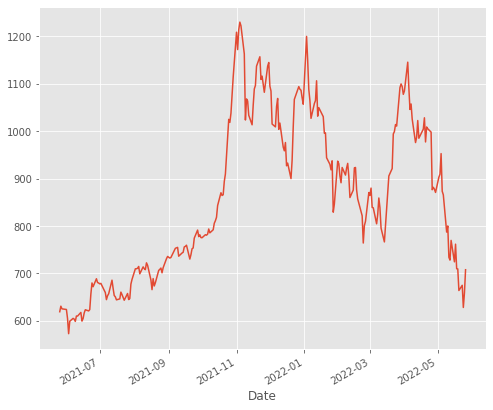

In [7]:
#print(df["Adj Close"])  # 便于查看
df["Adj Close"].plot(label="TSLA")  # 用Adj Close那列数据进行画图


6. 计算回报偏差


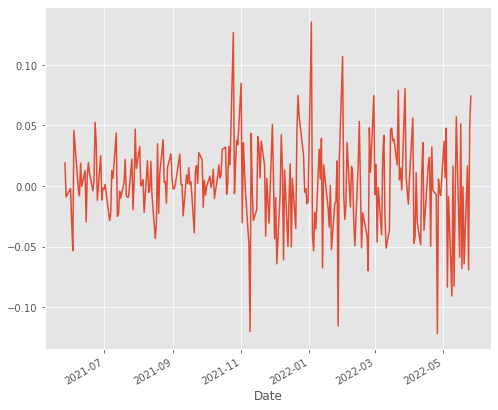

In [8]:
df["Return"] = df["Adj Close"]/df["Adj Close"].shift(1)-1
#shift(1)将数据下降一次
df["Return"].plot(label='return')
plt.show()


7. 删除前 10 行数据


In [9]:
# iloc函数，属于pands库，全称为index location，即对数据进行位置（location）索引（index）。
df = df.iloc[10:]

In [10]:
df.head(10)  # 输出头10个数据

,High,Low,Open,Close,Volume,Adj Close,EMA_10,Return
Date,,,,,,,,
2021-06-10,616.590027,600.500000,603.880005,610.119995,23919600,610.119995,608.680821,0.018938
2021-06-11,612.559998,601.520020,610.229980,609.890015,16205300,609.890015,608.900674,-0.000377
2021-06-14,625.489990,609.179993,612.229980,617.690002,20424000,617.690002,610.498734,0.012789
2021-06-15,616.789978,598.229980,616.690002,599.359985,17764100,599.359985,608.473507,-0.029675
2021-06-16,608.500000,593.500000,597.539978,604.869995,22144100,604.869995,607.818323,0.009193
2021-06-17,621.469971,601.340027,601.890015,616.599976,22701400,616.599976,609.414987,0.019393
2021-06-18,628.349976,611.799988,613.369995,623.309998,24560900,623.309998,611.941353,0.010882
2021-06-21,631.390015,608.880005,624.479980,620.830017,24812700,620.830017,613.557473,-0.003979
2021-06-22,628.570007,615.500000,618.250000,623.710022,19158900,623.710022,615.403391,0.004639


8. 最高价和最低价百分比

In [11]:
df_reg = df.loc[:, ['Adj Close', 'EMA_10', "Return"]]
# 参数1：利用切片遍历所有标签(从high开始，到Return结束)
# 参数2：以列表的形式对df数据操作，保留列表内的标签数据
df_reg["HL_PCT"] = (df['High']-df["Low"])/df["Close"]*100.0

In [12]:
df_reg

,Adj Close,EMA_10,Return,HL_PCT
Date,,,,
2021-06-10,610.119995,608.680821,0.018938,2.637191
2021-06-11,609.890015,608.900674,-0.000377,1.810159
2021-06-14,617.690002,610.498734,0.012789,2.640483
2021-06-15,599.359985,608.473507,-0.029675,3.096636
2021-06-16,604.869995,607.818323,0.009193,2.479872
...,...,...,...,...
2022-05-20,663.900024,746.346567,-0.064165,13.342373
2022-05-23,674.900024,733.356286,0.016569,6.208331
2022-05-24,628.159973,714.229684,-0.069255,5.309153


9. 计算收盘变化率

In [13]:
df_reg["PCT_change"] = (df['Close']-df["Open"])/df["Open"]*100.0


In [14]:
df_reg

,Adj Close,EMA_10,Return,HL_PCT,PCT_change
Date,,,,,
2021-06-10,610.119995,608.680821,0.018938,2.637191,1.033316
2021-06-11,609.890015,608.900674,-0.000377,1.810159,-0.055711
2021-06-14,617.690002,610.498734,0.012789,2.640483,0.891825
2021-06-15,599.359985,608.473507,-0.029675,3.096636,-2.810167
2021-06-16,604.869995,607.818323,0.009193,2.479872,1.226699
...,...,...,...,...,...
2022-05-20,663.900024,746.346567,-0.064165,13.342373,-7.015500
2022-05-23,674.900024,733.356286,0.016569,6.208331,3.035022
2022-05-24,628.159973,714.229684,-0.069255,5.309153,-3.882003


10. 预处理

- 在将数据放⼊预测模型之前，我们将对数据进⾏标准化，使每个样本都可以具有相同的线性回归分布。

In [15]:
from sklearn.preprocessing import scale
import math
import numpy as np

In [16]:
X = np.array(df_reg.drop(["EMA_10"],1))
# 将ema_10这⼀列去掉，剩余的作为训练数据x


C:\Users\tianjianxiang\AppData\Local\Temp\ipykernel_3032\2546948064.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df_reg.drop(["EMA_10"],1))


In [17]:
print(X)

[[ 6.10119995e+02  1.89384503e-02  2.63719055e+00  1.03331625e+00]
 [ 6.09890015e+02 -3.76943012e-04  1.81015884e+00 -5.57110977e-02]
 [ 6.17690002e+02  1.27891712e-02  2.64048268e+00  8.91825318e-01]
 [ 5.99359985e+02 -2.96751073e-02  3.09663608e+00 -2.81016670e+00]
 [ 6.04869995e+02  9.19315587e-03  2.47987173e+00  1.22669903e+00]
 [ 6.16599976e+02  1.93925646e-02  3.26466828e+00  2.44396162e+00]
 [ 6.23309998e+02  1.08822936e-02  2.65517766e+00  1.62055570e+00]
 [ 6.20830017e+02 -3.97872724e-03  3.62579275e+00 -5.84480447e-01]
 [ 6.23710022e+02  4.63895882e-03  2.09552626e+00  8.83141443e-01]
 [ 6.56570007e+02  5.26847160e-02  4.13665472e+00  3.88765939e+00]
 [ 6.79820007e+02  3.54113038e-02  4.41440520e+00  7.15568699e-01]
 [ 6.71869995e+02 -1.16942898e-02  3.73732799e+00 -2.56823306e+00]
 [ 6.88719971e+02  2.50792202e-02  3.53990096e+00  2.54302241e+00]
 [ 6.80760010e+02 -1.15576160e-02  1.70691506e+00 -5.68175639e-01]
 [ 6.79700012e+02 -1.55707965e-03  2.15830258e+00 -1.02986778e

In [18]:
X = scale(X)
# 对x进⾏标准化 (X-mean)/std


In [19]:
print(X)

[[-1.56711656e+00  4.74405873e-01 -7.97037271e-01  3.15104173e-01]
 [-1.56851818e+00 -4.72773555e-02 -1.12225912e+00 -7.80390186e-03]
 [-1.52098126e+00  3.08321976e-01 -7.95742673e-01  2.73150622e-01]
 [-1.63269329e+00 -8.38582025e-01 -6.16364968e-01 -8.24528989e-01]
 [-1.59911261e+00  2.11198359e-01 -8.58901305e-01  3.72444202e-01]
 [-1.52762442e+00  4.86670900e-01 -5.50288005e-01  7.33375377e-01]
 [-1.48673028e+00  2.56819735e-01 -7.89964023e-01  4.89226854e-01]
 [-1.50184449e+00 -1.44556784e-01 -4.08279465e-01 -1.64589581e-01]
 [-1.48429234e+00  8.81955194e-02 -1.01004127e+00  2.70575761e-01]
 [-1.28402763e+00  1.38584788e+00 -2.07388170e-01  1.16144697e+00]
 [-1.14233084e+00  9.19315861e-01 -9.81656043e-02  2.20888678e-01]
 [-1.19078208e+00 -3.52943926e-01 -3.64419364e-01 -7.52793117e-01]
 [-1.08809014e+00  6.40259948e-01 -4.42055541e-01  7.62747943e-01]
 [-1.13660201e+00 -3.49252546e-01 -1.16285869e+00 -1.59755034e-01]
 [-1.14306215e+00 -7.91512854e-02 -9.85355116e-01  5.66135876e

In [20]:
Y = np.array(df_reg['EMA_10'])


In [21]:
print(Y)

[ 608.68082109  608.90067446  610.4987341   608.47350705  607.81832306
  609.41498716  611.94135269  613.55747349  615.40339139  622.88823065
  633.23946278  640.26319593  649.07351861  654.83469882  659.35566489
  662.73099544  665.67081889  664.56340038  660.94278657  659.46409766
  659.00699121  663.86026776  664.71112417  662.65092066  660.45983974
  657.50713628  655.45492436  656.37221084  656.17544124  654.91809006
  652.82025639  653.69293616  652.07240764  651.14651179  655.91077793
  661.59972962  670.33977567  677.50345105  683.57918411  689.22478789
  691.02027656  695.15477351  697.85208564  699.66443504  703.77090139
  706.20709803  702.56398619  695.86326543  694.61357903  690.7692866
  688.858509    692.02968696  695.02246937  697.9638408   698.54495577
  700.97677889  706.41917784  711.74659473  715.80903693  718.82376015
  721.504896    727.21672999  732.06277819  736.20772495  736.21905124
  737.45195101  738.73159451  741.84039861  744.59486982  747.30307353
  744.1

In [22]:
X_lately = X[-10:]  # 倒数十条数据
X = X[:-10]  # 除去后十条的数据
Y = Y[:-10]  # 除去后十条的数据


In [23]:
print(X[:5])
print(X.shape)
print(Y.shape)


[[-1.56711656  0.47440587 -0.79703727  0.31510417]
 [-1.56851818 -0.04727736 -1.12225912 -0.0078039 ]
 [-1.52098126  0.30832198 -0.79574267  0.27315062]
 [-1.63269329 -0.83858203 -0.61636497 -0.82452899]
 [-1.59911261  0.21119836 -0.85890131  0.3724442 ]]
(234, 4)
(234,)


11. 模型训练

In [24]:
from sklearn.linear_model import LinearRegression  # LinearRegression ————> 线性回归
from sklearn.neighbors import KNeighborsRegressor # KNeighborsRegressor ————> k近邻回归
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split  # 训练集和测试集的划分


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=.2, random_state=2022)


- 进行线性回归

In [26]:
clfreg = LinearRegression(n_jobs=-1)  # n_jobs表示启动设备cpu的核心个数,-1表示启动所有的核心
clfreg.fit(X_train, Y_train)  # 训练
confidencereg = clfreg.score(X_test, Y_test)  # 利用测试集进行评估


In [27]:
print('线性回归模型决定系数为 ', confidencereg)


线性回归模型决定系数为  0.9607696648538135


In [28]:
forecast_set = clfreg.predict(X_lately)  # 进行预测
df_reg["Forecast"] = np.nan  # 建立全是NaN的列表,用来给后面更新


In [29]:
print(forecast_set.shape)

(10,)


In [30]:
df_reg  # 应该是print(df_reg)


,Adj Close,EMA_10,Return,HL_PCT,PCT_change,Forecast
Date,,,,,,
2021-06-10,610.119995,608.680821,0.018938,2.637191,1.033316,NaN
2021-06-11,609.890015,608.900674,-0.000377,1.810159,-0.055711,NaN
2021-06-14,617.690002,610.498734,0.012789,2.640483,0.891825,NaN
2021-06-15,599.359985,608.473507,-0.029675,3.096636,-2.810167,NaN
2021-06-16,604.869995,607.818323,0.009193,2.479872,1.226699,NaN
...,...,...,...,...,...,...
2022-05-20,663.900024,746.346567,-0.064165,13.342373,-7.015500,NaN
2022-05-23,674.900024,733.356286,0.016569,6.208331,3.035022,NaN
2022-05-24,628.159973,714.229684,-0.069255,5.309153,-3.882003,NaN


In [31]:
last_date = df_reg.iloc[-1].name  # 索引最后一行数据的行标题


In [32]:
print(last_date)


2022-05-26 00:00:00


In [33]:
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)  # 数学里面的Δ,变化days=1为一天


In [34]:
print(next_unix)

2022-05-27 00:00:00


In [35]:
for i in forecast_set:
    next_date = next_unix
    next_unix+=datetime.timedelta(days = 1)
    df_reg.loc[next_date] = [np.nan for _ in range(len(df_reg.columns)-1)]+[i]
    print(df_reg.loc[next_date])


Adj Close            NaN
EMA_10               NaN
Return               NaN
HL_PCT               NaN
PCT_change           NaN
Forecast      733.291745
Name: 2022-05-27 00:00:00, dtype: float64
Adj Close            NaN
EMA_10               NaN
Return               NaN
HL_PCT               NaN
PCT_change           NaN
Forecast      792.563413
Name: 2022-05-28 00:00:00, dtype: float64
Adj Close            NaN
EMA_10               NaN
Return               NaN
HL_PCT               NaN
PCT_change           NaN
Forecast      734.290051
Name: 2022-05-29 00:00:00, dtype: float64
Adj Close            NaN
EMA_10               NaN
Return               NaN
HL_PCT               NaN
PCT_change           NaN
Forecast      797.872917
Name: 2022-05-30 00:00:00, dtype: float64
Adj Close            NaN
EMA_10               NaN
Return               NaN
HL_PCT               NaN
PCT_change           NaN
Forecast      732.766092
Name: 2022-05-31 00:00:00, dtype: float64
Adj Close            NaN
EMA_10         

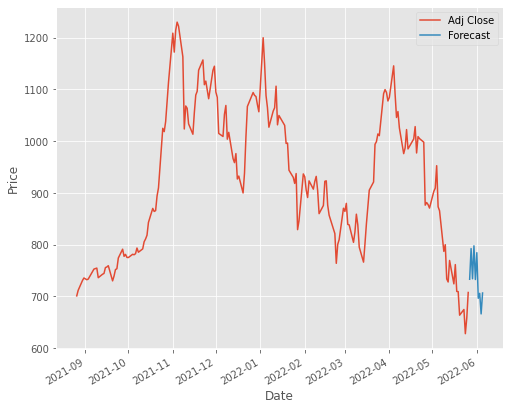

In [36]:
df_reg["Adj Close"].tail(200).plot()
df_reg['Forecast'].tail(200).plot()
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
